# Capstone 3: Pre-Processing

This section will standardize columns, create dumy variables and split the data into train and test sets. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from time import strptime

In [2]:
exports = pd.read_excel('../data/EDA_exports.xlsx')
yearly_shipments = pd.read_excel('../data/EDA_yearly_shipments.xlsx')

In [3]:
exports.head()

,Year,Value,Country,HS Code Number,HS Code Description
0,2010,2575,Comoros,8411917050,"PARTS OF TURBOJET & TURBOPROPELLR A/C ENG,EX C..."
1,2010,2629,Belize,8411917050,"PARTS OF TURBOJET & TURBOPROPELLR A/C ENG,EX C..."
2,2010,3286,Belarus,8411997050,"PARTS OF GAS TURBINE A/C ENG, EXC CIVIL A/C"
3,2010,3348,Jamaica,8411997050,"PARTS OF GAS TURBINE A/C ENG, EXC CIVIL A/C"
4,2010,3500,Guatemala,8411997050,"PARTS OF GAS TURBINE A/C ENG, EXC CIVIL A/C"


In [4]:
print(len(yearly_shipments))
print(yearly_shipments.head())

360
  Year-Month  Export Value (millions of dollars)
0 1992-01-01                                2719
1 1992-02-01                                3496
2 1992-03-01                                3018
3 1992-04-01                                3433
4 1992-05-01                                2916


In [5]:
#seeing how many countries and how many HS codes are included in this dataset
print('Unique countries in dataset: ', exports.Country.nunique())
print('Unique HS Codes in dataset: ', exports['HS Code Number'].unique())

Unique countries in dataset:  174
Unique HS Codes in dataset:  [8411917050 8411997050 8411114050 8411824050 8411214050 8411224050
 8411814050 8411124050]


174 is too many countries to focus on, a company would be narrowing down from 174 companies to a handful of the top ones. Going to limit to the top ten in each HS Code division. There are also 8 different HS Codes in this dataframe which is alot to look at. In the [exploratory data analysis](https://public.tableau.com/app/profile/ashley.grindal/viz/Capstone3EDA/YearlyExportsfrom1992to2021) step we saw that HS Code 8411917050, parts of turbojet and turbopropeller engines, and HS Code 8411997050, parts of gas turbine engines were the top two exports by a wide margin, at \\$3.2B and \\$1.1B in 2021 respectively. The Company would be smart to start into the export business gradually, and focusing on these top two categories is the best business move. 

The next two highest HS codes would be 8411124050 at \\$0.57B and 8411814050 at \\$0.29B in 2021. These two categories could be explored in a future iteration of this project.

#### Breaking Exports df down into two

In [6]:
exports_turbo = exports[exports['HS Code Number'] == 8411917050]
exports_gas = exports[exports['HS Code Number'] == 8411997050]

In [7]:
#Checking exports_turbo
print('Unique countries: ', exports_turbo.Country.nunique())
exports_turbo.head()

Unique countries:  147


,Year,Value,Country,HS Code Number,HS Code Description
0,2010,2575,Comoros,8411917050,"PARTS OF TURBOJET & TURBOPROPELLR A/C ENG,EX C..."
1,2010,2629,Belize,8411917050,"PARTS OF TURBOJET & TURBOPROPELLR A/C ENG,EX C..."
6,2010,3940,Macao,8411917050,"PARTS OF TURBOJET & TURBOPROPELLR A/C ENG,EX C..."
8,2010,4740,Cyprus,8411917050,"PARTS OF TURBOJET & TURBOPROPELLR A/C ENG,EX C..."
9,2010,4925,Burkina (Upper Volta),8411917050,"PARTS OF TURBOJET & TURBOPROPELLR A/C ENG,EX C..."


In [8]:
exports_turbo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1006 entries, 0 to 3280
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Year                 1006 non-null   int64 
 1   Value                1006 non-null   int64 
 2   Country              1006 non-null   object
 3   HS Code Number       1006 non-null   int64 
 4   HS Code Description  1006 non-null   object
dtypes: int64(3), object(2)
memory usage: 47.2+ KB


In [9]:
#Checking exports_gas
print('Unique countries: ', exports_gas.Country.nunique())
exports_gas.head()

Unique countries:  153


,Year,Value,Country,HS Code Number,HS Code Description
2,2010,3286,Belarus,8411997050,"PARTS OF GAS TURBINE A/C ENG, EXC CIVIL A/C"
3,2010,3348,Jamaica,8411997050,"PARTS OF GAS TURBINE A/C ENG, EXC CIVIL A/C"
4,2010,3500,Guatemala,8411997050,"PARTS OF GAS TURBINE A/C ENG, EXC CIVIL A/C"
5,2010,3794,Paraguay,8411997050,"PARTS OF GAS TURBINE A/C ENG, EXC CIVIL A/C"
10,2010,5300,Estonia,8411997050,"PARTS OF GAS TURBINE A/C ENG, EXC CIVIL A/C"


In [10]:
exports_gas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1024 entries, 2 to 3279
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Year                 1024 non-null   int64 
 1   Value                1024 non-null   int64 
 2   Country              1024 non-null   object
 3   HS Code Number       1024 non-null   int64 
 4   HS Code Description  1024 non-null   object
dtypes: int64(3), object(2)
memory usage: 48.0+ KB


Everything looks good, narrowing down to the top ten exporters in each category from 2010 - 2021.

In [11]:
#Turbo first - looking at top 11 to account for .WORLD
exports_turbo.groupby(['Country'])['Value'].sum().sort_values(ascending = False).head(11)

Country
.WORLD            15746222997
Korea              2685780172
Japan              1595867673
Israel             1299714730
United Kingdom     1213663839
Singapore           816837099
Mexico              774875216
Turkey              739305043
Portugal            705320542
Italy               560128049
Brazil              555474736
Name: Value, dtype: int64

In [12]:
#now gas - again looking at top 11
exports_gas.groupby(['Country'])['Value'].sum().sort_values(ascending = False).head(11)

Country
.WORLD            6033059728
Mexico            1532021747
Canada            1335460106
Japan              443769342
United Kingdom     359220839
Korea              289190815
France             288719095
Brazil             166672774
Germany            165322971
Portugal           140560881
Taiwan             124280315
Name: Value, dtype: int64

### Stationarize and ACF/PACF charts for yearly_shipments

In [13]:
import statsmodels.api as sm 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

p-value:  0.730684937239155


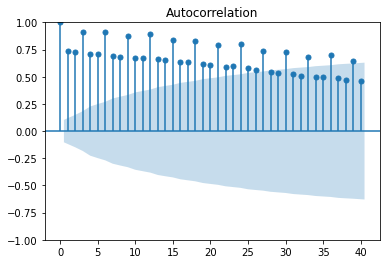

C:\Users\ashle\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


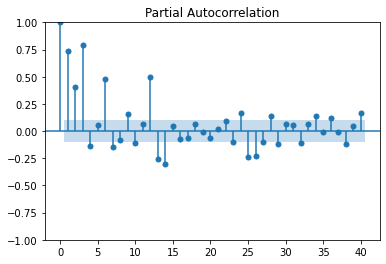

In [14]:
ys_results = adfuller(yearly_shipments['Export Value (millions of dollars)'])
print('p-value: ', ys_results[1])
plot_acf(yearly_shipments['Export Value (millions of dollars)'], lags=40)
plt.show()
plot_pacf(yearly_shipments['Export Value (millions of dollars)'], lags=40)
plt.show()

In [15]:
#Estimate number of differences needed
from pmdarima.arima.utils import ndiffs

print('Adf test: ', ndiffs(yearly_shipments['Export Value (millions of dollars)'], test = 'adf'))
print('KPSS test: ', ndiffs(yearly_shipments['Export Value (millions of dollars)'], test = 'kpss'))
print('PP test: ', ndiffs(yearly_shipments['Export Value (millions of dollars)'], test = 'pp'))

Adf test:  1
KPSS test:  1
PP test:  0


Should theoretically take one difference to make the data stationary. There does seem to be a quarterly trend, but also a yearly. Since yearly would be the alrger trend, I'm going to see the results of that one first.

In [16]:
yearly_shipments['year_diff'] = yearly_shipments['Export Value (millions of dollars)'].diff(12)
ys_results2 = adfuller(yearly_shipments['year_diff'].dropna(inplace = False))
print('p-value: ', ys_results2[1])

p-value:  0.027025662844520914


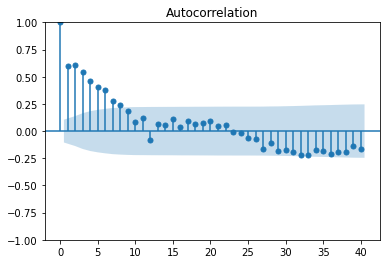

C:\Users\ashle\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


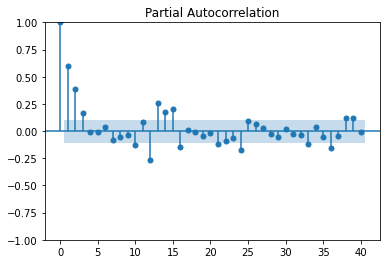

In [17]:
plot_acf(yearly_shipments['year_diff'].iloc[12:], lags=40)
plt.show()
plot_pacf(yearly_shipments['year_diff'].iloc[12:], lags=40)
plt.show()

In [18]:
#going to see if taking a first difference of the yearly corrected data helps at all
yearly_shipments['first_year_diff'] = yearly_shipments['year_diff'].diff(1)
ys_results3 = adfuller(yearly_shipments['first_year_diff'].dropna(inplace = False))
print('p-value: ', ys_results3[1])

p-value:  3.002529735499827e-10


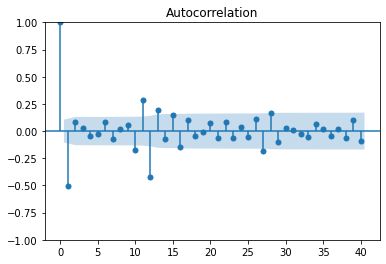

C:\Users\ashle\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


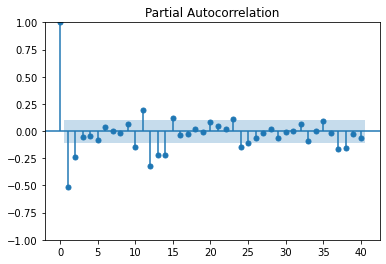

In [19]:
plot_acf(yearly_shipments['first_year_diff'].iloc[13:], lags=40)
plt.show()
plot_pacf(yearly_shipments['first_year_diff'].iloc[13:], lags=40)
plt.show()

The values go negative very fast, going to stick with the year adjusted data.

### Modelling for yearly_shipments

In [20]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

AR model first

In [21]:
ar_model = ARIMA(yearly_shipments['year_diff'], order = (3,0,0))
ar_res = ar_model.fit()
ar_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              year_diff   No. Observations:                  360
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -2553.262
Date:                Tue, 07 Feb 2023   AIC                           5116.523
Time:                        21:10:31   BIC                           5135.954
Sample:                             0   HQIC                          5124.249
                                - 360                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.6465     96.445      0.453      0.651    -145.383     232.676
ar.L1          0.3041      0.050      6.137      0.000       0.207       0.401
ar.L2          0.3242      0.049      6.624      0.000       0.228       0.420
ar.L3          0.1635      0.055      2.966      0.003       0.055       0.272
sigma2      1.385e+05   8258.822     16.766      0.000    1.22e+05    1.55e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                42.68
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

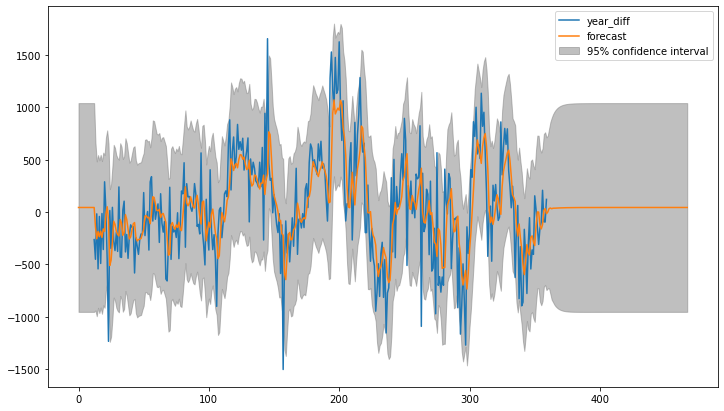

In [22]:
fig, ax = plt.subplots(figsize = (12,7))
yearly_shipments['year_diff'].plot(ax=ax)
plot_predict(ar_res, start = 0, end = 467, ax = ax)
plt.show()

Now for a purely MA model

In [23]:
ma_model = ARIMA(yearly_shipments['year_diff'], order = (0,0,7))
ma_res = ma_model.fit(method_kwargs={'maxiter':300})
ma_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              year_diff   No. Observations:                  360
Model:                 ARIMA(0, 0, 7)   Log Likelihood               -2554.573
Date:                Tue, 07 Feb 2023   AIC                           5127.147
Time:                        21:10:31   BIC                           5162.122
Sample:                             0   HQIC                          5141.054
                                - 360                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.6464     64.019      0.682      0.495     -81.828     169.120
ma.L1          0.3200      0.053      6.087      0.000       0.217       0.423
ma.L2          0.3620      0.050      7.180      0.000       0.263       0.461
ma.L3          0.2961      0.056      5.288      0.000       0.186       0.406
ma.L4          0.1271      0.050      2.528      0.011       0.029       0.226
ma.L5          0.1167      0.056      2.070      0.038       0.006       0.227
ma.L6          0.5223      0.053      9.901      0.000       0.419       0.626
ma.L7          0.1533      0.060      2.566      0.010       0.036       0.270
sigma2      1.475e+05   1.01e+04     14.582      0.000    1.28e+05    1.67e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                25.15
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               2.22   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

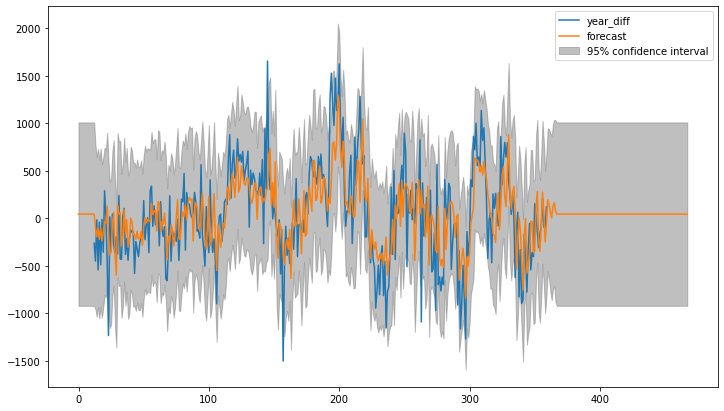

In [24]:
fig, ax = plt.subplots(figsize = (12,7))
yearly_shipments['year_diff'].plot(ax=ax)
plot_predict(ma_res, start = 0, end = 467, ax = ax)
plt.show()

Combined model

In [25]:
arma_model = ARIMA(yearly_shipments['year_diff'], order = (2,0,1))
arma_res = arma_model.fit()
arma_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              year_diff   No. Observations:                  360
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -2553.959
Date:                Tue, 07 Feb 2023   AIC                           5117.918
Time:                        21:10:32   BIC                           5137.349
Sample:                             0   HQIC                          5125.644
                                - 360                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.6464     98.369      0.444      0.657    -149.154     236.446
ar.L1          0.6354      0.119      5.325      0.000       0.402       0.869
ar.L2          0.2280      0.087      2.607      0.009       0.057       0.400
ma.L1         -0.3265      0.119     -2.745      0.006      -0.560      -0.093
sigma2      1.385e+05   8197.638     16.895      0.000    1.22e+05    1.55e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                37.35
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.06   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

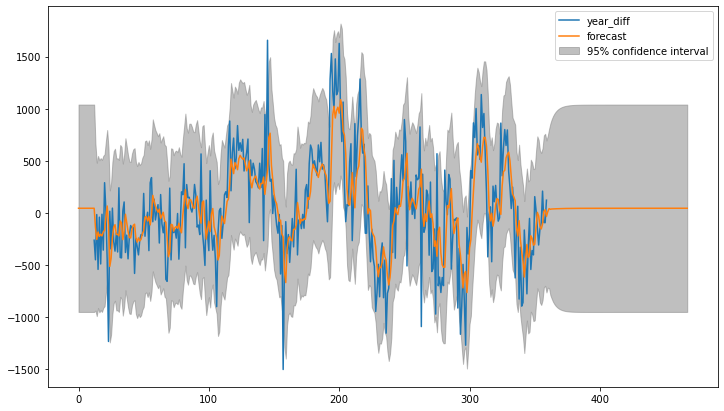

In [26]:
fig, ax = plt.subplots(figsize = (12,7))
yearly_shipments['year_diff'].plot(ax=ax)
plot_predict(arma_res, start = 0, end = 467, ax = ax)
plt.show()

Going to try a SARIMA model

In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(yearly_shipments['Export Value (millions of dollars)'], trend = 't', order = (1,0,2), seasonal_order = (0,1,1,12))
s_res = sarima.fit(maxiter = 700)
s_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:     Export Value (millions of dollars)   No. Observations:                  360
Model:               SARIMAX(1, 0, 2)x(0, 1, [1], 12)   Log Likelihood               -2513.676
Date:                                Tue, 07 Feb 2023   AIC                           5039.352
Time:                                        21:12:03   BIC                           5062.465
Sample:                                             0   HQIC                          5048.553
                                                - 360                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0173      0.017      1.037      0.300      -0.015       0.050
ar.L1          0.9353      0.018     51.384      0.000       0.900       0.971
ma.L1         -0.6637      0.050    -13.261      0.000      -0.762      -0.566
ma.L2          0.1374      0.059      2.326      0.020       0.022       0.253
ma.S.L12      -0.6132      0.044    -14.064      0.000      -0.699      -0.528
sigma2      1.052e+05   6069.945     17.334      0.000    9.33e+04    1.17e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.57   Jarque-Bera (JB):                45.16
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               1.72   Skew:                             0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

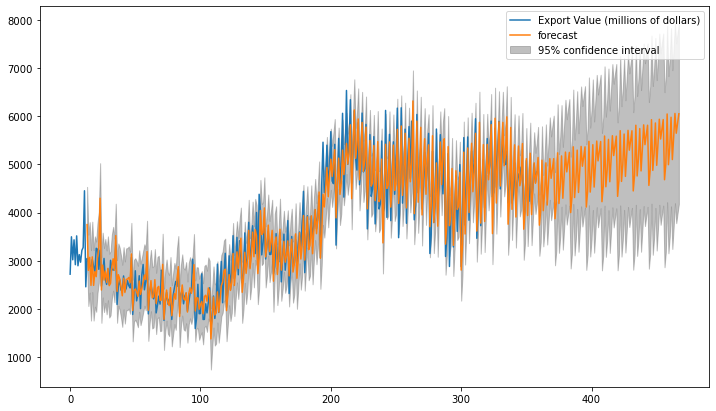

In [31]:
fig, ax = plt.subplots(figsize = (12,7))
yearly_shipments['Export Value (millions of dollars)'].plot(ax=ax)
plot_predict(s_res, start = 13, end = 467, ax = ax)
plt.show()

### Conclusion

Based on the AIC numbers from each model, the SARIMAX model performed the best. The graph does look like it fits the data pretty well, though the future model is just a repeated cycle, which is expected when dealing with something like defense exports that can be heavily influenced by many outside parameters. Meaning that it is hard to capture and predict those outlying causes.

Overall, I'm confident in saying that it would be a smart business decision to move into defense exports, focussing specifically on the two top categories first, then expanding further based on the success of that move.